<a href="https://colab.research.google.com/github/commandermaks/Python/blob/main/Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Perceptron

Perceptron is the first neural network to be created. It was designed by Frank Rosenblatt in 1957. Perceptron is the only neural network without any hidden layer, it is the basic single-layered neural network used for binary classification.

The goal is to obtain a set of weights w that accurately classifies each instance in our training set. In order to train our Perceptron, we iteratively feed the network with our training data multiple times. Each time the network has seen the full set of training data, we say an epoch has passed. It normally takes many epochs until a weight vector w can be learned to linearly separate our two classes of data.

#### Let us try to understand the Perceptron algorithm using the following data as a example.

In [ ]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
X, y = datasets.make_blobs(n_samples=150,n_features=2,
                           centers=2,cluster_std=1.05,
                           random_state=2)

Text(0.5, 1.0, 'Random Classification Data with 2 classes')

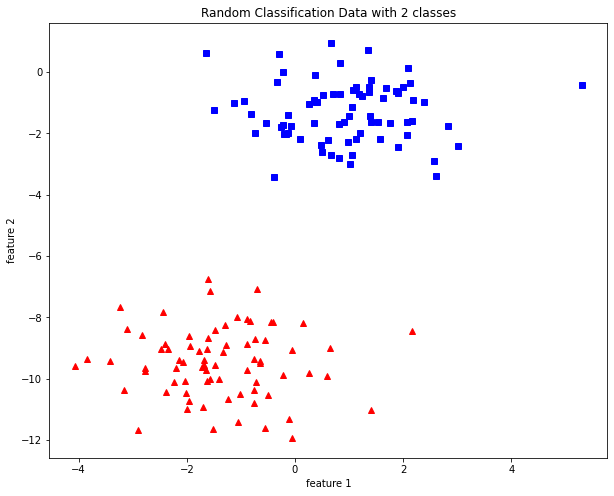

In [ ]:
#Plotting
fig = plt.figure(figsize=(10,8))
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'r^')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title('Random Classification Data with 2 classes')

![Perceptron_1.PNG](attachment:Perceptron_1.PNG)

Weights shows the strength of the particular node.
A bias value allows you to shift the activation function curve up or down.

The perceptron model begins with multiplying all input values and their weights, then adds these values to create the weighted sum. Further, this weighted sum is applied to the activation function or step function to obtain the desired output. The activation functions are used to map the input between the required values like (0, 1) or (-1, 1).

#### Unit Step Function

![image_2022-10-11_172737362.png](attachment:image_2022-10-11_172737362.png)

In [ ]:
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.activation_func = self._unit_step_func
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        y_ = np.array([1 if i > 0 else 0 for i in y])

        for _ in range(self.n_iters):

            for idx, x_i in enumerate(X):

                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_func(linear_output)

                # Perceptron update rule
                update = self.lr * (y_[idx] - y_predicted)

                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation_func(linear_output)
        return y_predicted

    def _unit_step_func(self, x):
        return np.where(x >= 0, 1, 0)

####  Testing

In [ ]:
if __name__ == "__main__":
    # Imports
    import matplotlib.pyplot as plt
    from sklearn.model_selection import train_test_split
    from sklearn import datasets

    def accuracy(y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy

    X, y = datasets.make_blobs(
        n_samples=150, n_features=2, centers=2, cluster_std=1.05, random_state=2
    )
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=123
    )

    p = Perceptron(learning_rate=0.01, n_iters=1000)
    p.fit(X_train, y_train)
    predictions = p.predict(X_test)

    print("Perceptron classification accuracy", accuracy(y_test, predictions))

Perceptron classification accuracy 1.0


####  Plotting


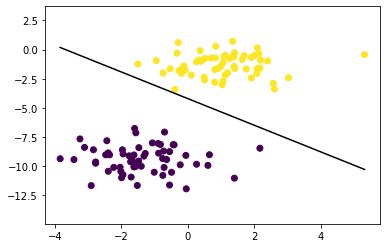

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.scatter(X_train[:, 0], X_train[:, 1], marker="o", c=y_train)

x0_1 = np.amin(X_train[:, 0])
x0_2 = np.amax(X_train[:, 0])

x1_1 = (-p.weights[0] * x0_1 - p.bias) / p.weights[1]
x1_2 = (-p.weights[0] * x0_2 - p.bias) / p.weights[1]

ax.plot([x0_1, x0_2], [x1_1, x1_2], "k")

ymin = np.amin(X_train[:, 1])
ymax = np.amax(X_train[:, 1])
ax.set_ylim([ymin - 3, ymax + 3])

plt.show()

## Assignment

#### Implement Perceptron algorithm for AND, OR and NOT logic gate with 2-bit binary input.